In [44]:

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
file_path = r'D:\PORTFOLIO DATASET\house_sales.csv'
data = pd.read_csv(file_path)
data.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [45]:
print(data.info())
print(data.describe())


print(data.isnull().sum())


data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22687 entries, 0 to 22686
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DocumentDate     22687 non-null  object 
 1   SalePrice        22687 non-null  int64  
 2   PropertyID       22687 non-null  int64  
 3   PropertyType     22687 non-null  object 
 4   ym               22687 non-null  object 
 5   zhvi_px          22687 non-null  int64  
 6   zhvi_idx         22687 non-null  float64
 7   AdjSalePrice     22687 non-null  float64
 8   NbrLivingUnits   22687 non-null  int64  
 9   SqFtLot          22687 non-null  int64  
 10  SqFtTotLiving    22687 non-null  int64  
 11  SqFtFinBasement  22687 non-null  int64  
 12  Bathrooms        22687 non-null  float64
 13  Bedrooms         22687 non-null  int64  
 14  BldgGrade        22687 non-null  int64  
 15  YrBuilt          22687 non-null  int64  
 16  YrRenovated      22687 non-null  int64  
 17  TrafficNoise

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
0,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
1,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
2,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
3,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
4,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


The dataset is successfully loaded, and there are no missing values in the selected columns. These variables will serve as predictors (SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade) and the target variable (AdjSalePrice) for our regression analysis.

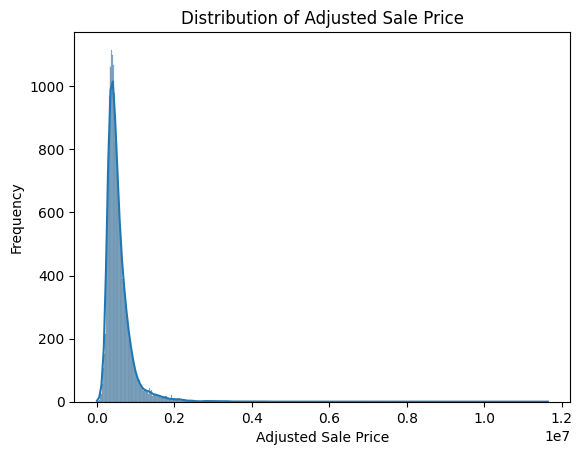

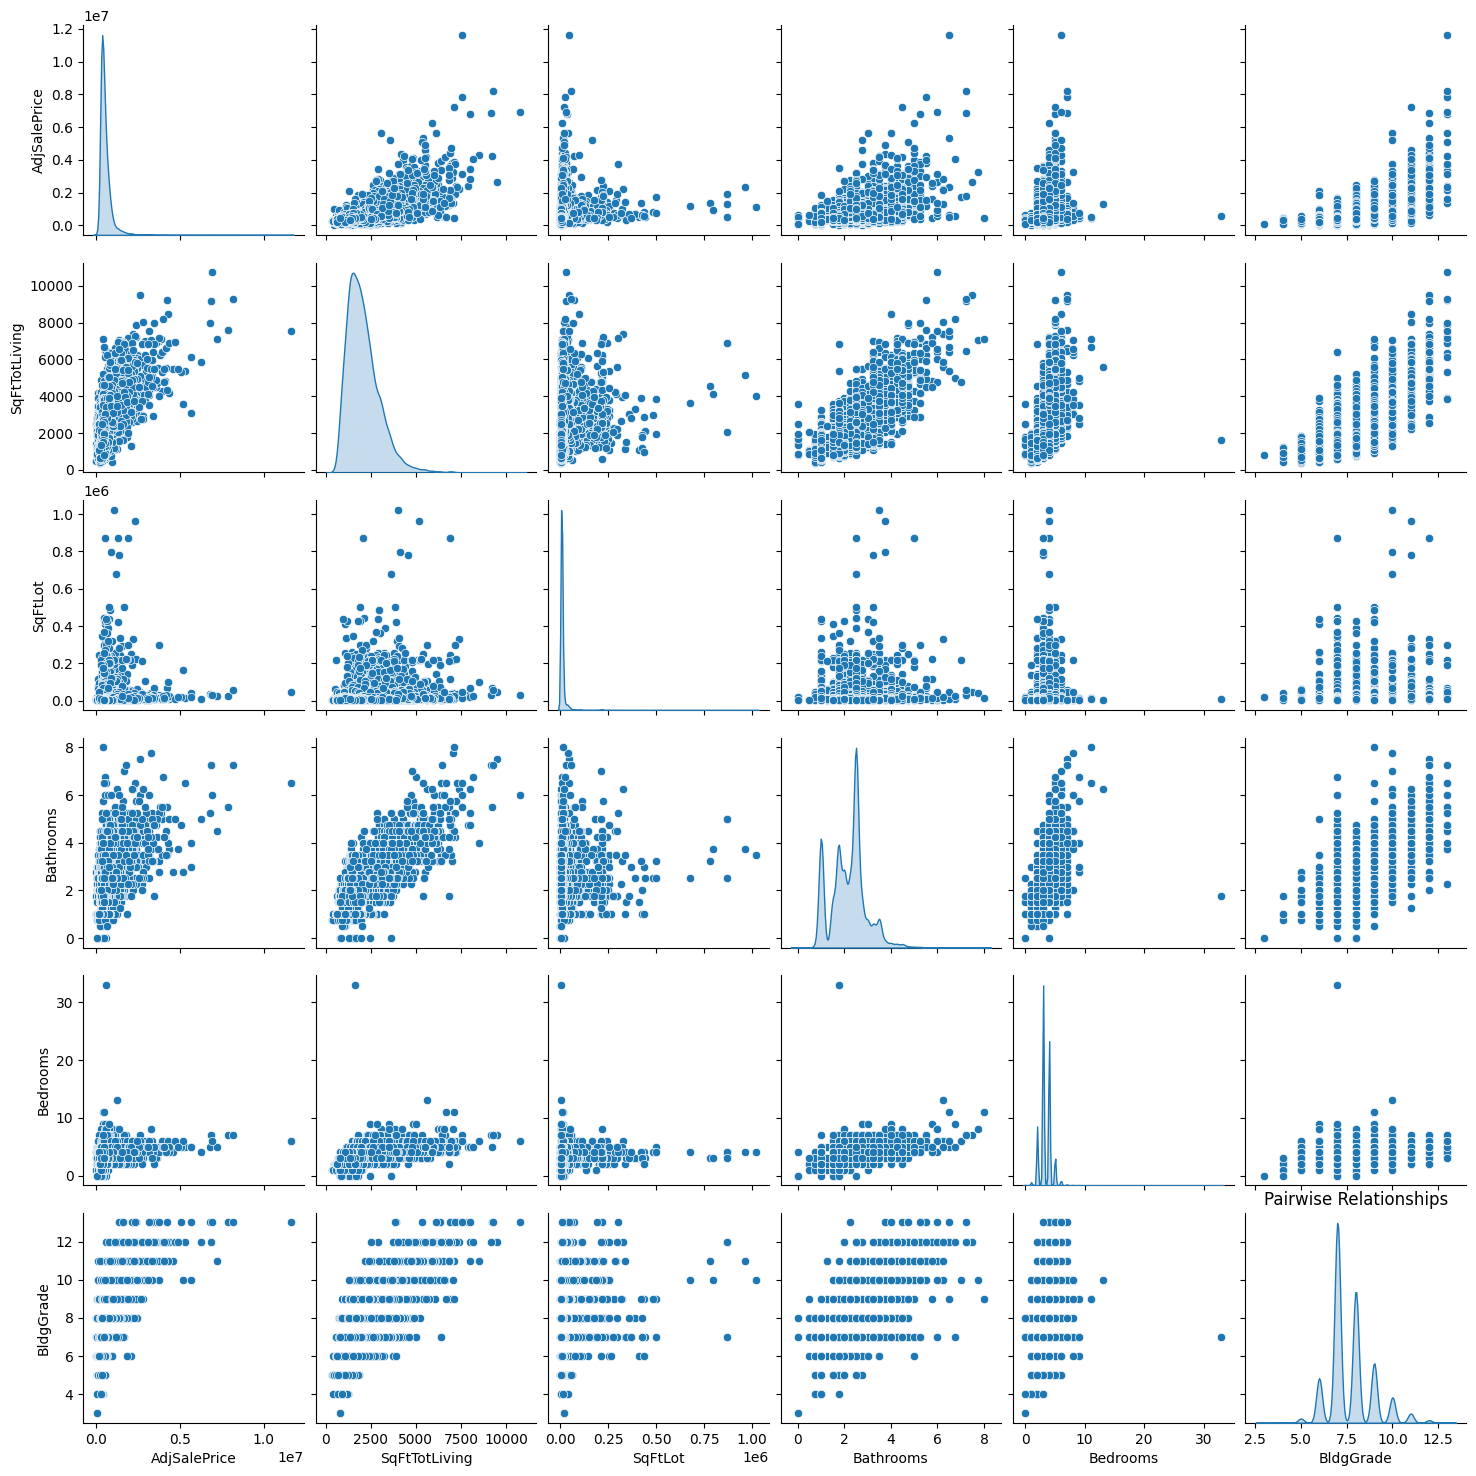

In [50]:

sns.histplot(data['AdjSalePrice'], kde=True)
plt.title('Distribution of Adjusted Sale Price')
plt.xlabel('Adjusted Sale Price')
plt.ylabel('Frequency')
plt.show()

sns.pairplot(data, diag_kind='kde')
plt.title('Pairwise Relationships')
plt.show()


Adjusted Sale Price Distribution: The target variable (AdjSalePrice) is highly right-skewed, indicating the presence of expensive outliers or a few extremely high-value properties.

Pairwise Relationships:
SqFtTotLiving appears positively correlated with AdjSalePrice, which is expected.
Other predictors like Bathrooms, Bedrooms, and BldgGrade also show patterns suggesting potential relationships with the target variable.

Correlation Analysis
To further quantify the relationships, we calculate the correlation matrix and visualize it with a heatmap.

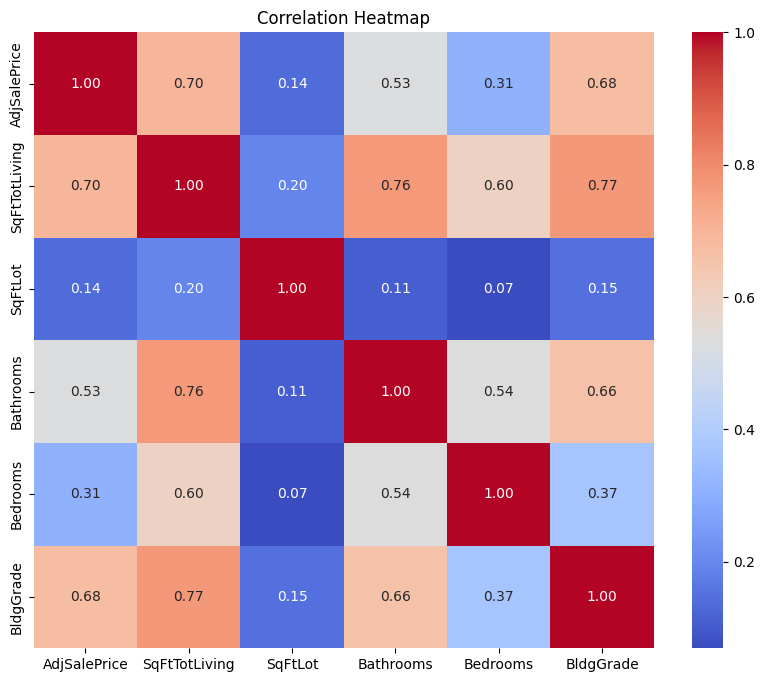

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Correlations with Target (AdjSalePrice):

SqFtTotLiving and BldgGrade have strong positive correlations with AdjSalePrice (0.70 and 0.68, respectively).
Bathrooms also shows a moderate correlation (0.53).
SqFtLot and Bedrooms have weaker correlations with the target variable (0.14 and 0.31, respectively).

Predictor Interrelationships:

Predictors such as SqFtTotLiving and BldgGrade are strongly correlated (0.77), which might introduce multicollinearity, something we need to check later.

# Multiple Linear Regression Model

We will now create a multiple linear regression model to predict AdjSalePrice using the selected predictors.

In [55]:
from sklearn.linear_model import LinearRegression
import pandas as pd


predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'


X = data[predictors]
y = data[outcome]


model = LinearRegression()
model.fit(X, y)

print(f"Intercept: {model.intercept_:.2f}")
print("Coefficients:")
for feature, coef in zip(predictors, model.coef_):
    print(f"  {feature}: {coef:.2f}")



Intercept: -521871.37
Coefficients:
  SqFtTotLiving: 228.83
  SqFtLot: -0.06
  Bathrooms: -19442.84
  Bedrooms: -47769.96
  BldgGrade: 106106.96


The regression model is now fitted, and the coefficients represent the relationship between the predictors and AdjSalePrice. Here’s the interpretation:

Intercept (-521,871.37):

Represents the baseline predicted AdjSalePrice when all predictors are zero. While not interpretable in this context, it provides a reference point for the model.

Coefficients:

SqFtTotLiving (228.83): For each additional square foot of living space, the predicted price increases by approximately $229, holding other factors constant.

SqFtLot (-0.06): Lot size has a negligible negative impact, with each square foot reducing the price by $0.06, likely due to noise or interactions.

Bathrooms (-19,442.84): Surprisingly, an increase in the number of bathrooms slightly reduces the predicted price, suggesting potential multicollinearity or interaction effects.

Bedrooms (-47,769.96): Additional bedrooms reduce the price significantly, possibly reflecting trade-offs between larger houses with more rooms and other valuable features.

BldgGrade (106,106.96): Building grade has a strong positive impact, with each unit increase in grade adding approximately $106,107 to the predicted price.

### Assessing Model Performance

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


y_pred = model.predict(X)


rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")


Root Mean Squared Error (RMSE): 261220.20
R-squared (R²): 0.5406


Root Mean Squared Error (RMSE: 261,220.20):

This indicates that, on average, the model's predictions deviate from the actual AdjSalePrice by approximately $261,220, which is relatively high for housing prices. This suggests that there is room for model improvement.

R-squared (R²: 0.5406):

The model explains approximately 54.1% of the variance in AdjSalePrice. While this shows the model captures some key relationships, nearly 46% of the variance remains unexplained, suggesting other factors (features) could improve the model.

### Residual Analysis

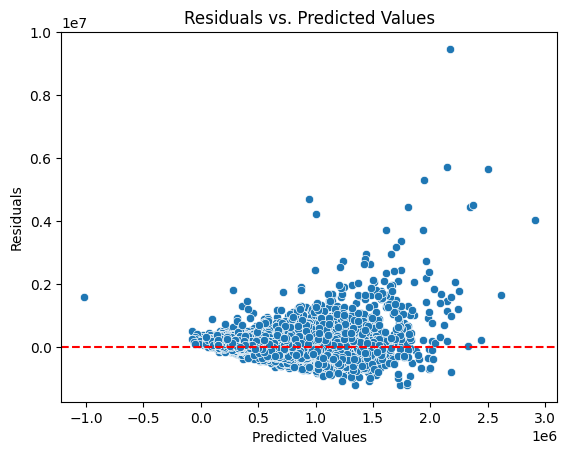

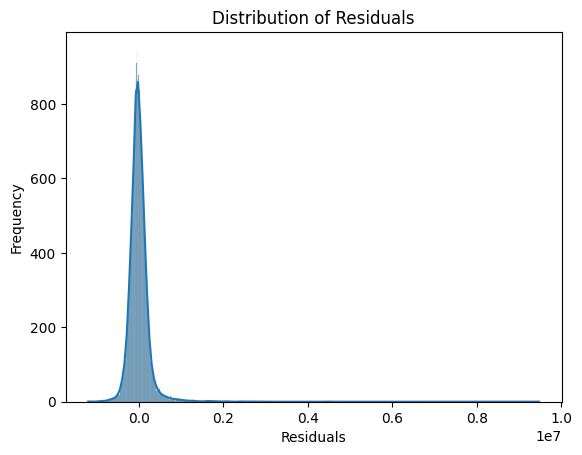

In [ ]:

residuals = y - y_pred


sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

older sales may not reflect current market trends as reliably as recent sales. Weighted regression gives more importance to recent sales by assigning higher weights to them.

In [ ]:

data['Year'] = pd.to_datetime(data['DocumentDate']).dt.year

# Calculate weights as the number of years since 2005
data['Weight'] = data['Year'] - 2005


model_weighted = LinearRegression()
model_weighted.fit(X, y, sample_weight=data['Weight'])

print(f"Weighted Regression Intercept: {model_weighted.intercept_:.2f}")
print("Weighted Regression Coefficients:")
for feature, coef in zip(predictors, model_weighted.coef_):
    print(f"  {feature}: {coef:.2f}")


Weighted Regression Intercept: -584189.33
Weighted Regression Coefficients:
  SqFtTotLiving: 245.02
  SqFtLot: -0.29
  Bathrooms: -26085.97
  Bedrooms: -53608.88
  BldgGrade: 115242.43


Comparison of Coefficients:

SqFtTotLiving (245.02): Slightly higher than the unweighted model (228.83), indicating a stronger relationship between living space and sale price in recent sales.

SqFtLot (-0.29): The negative relationship with lot size becomes more pronounced, though still minor, suggesting this feature may be less impactful in recent years.

Bathrooms (-26,085.97): The negative coefficient has increased, reinforcing that additional bathrooms are less correlated with price when focusing on recent sales.

Bedrooms (-53,608.88): Bedrooms remain negatively correlated, with a stronger decrease in value compared to the unweighted model.

BldgGrade (115,242.43): The impact of building grade is now more significant compared to the unweighted model (106,106.96), reflecting its importance in recent sales.

In [60]:

y_pred_weighted = model_weighted.predict(X)


rmse_weighted = np.sqrt(mean_squared_error(y, y_pred_weighted))
r2_weighted = r2_score(y, y_pred_weighted)


print(f"Weighted Regression RMSE: {rmse_weighted:.2f}")
print(f"Weighted Regression R-squared (R²): {r2_weighted:.4f}")


Weighted Regression RMSE: 261908.06
Weighted Regression R-squared (R²): 0.5382


Weighted Model Performance:

RMSE: 261,908.06: Slightly higher than the unweighted RMSE (261,220.20), indicating the weighted model has a marginally higher prediction error overall.

R-squared: 0.5382: Slightly lower than the unweighted R-squared (0.5406), meaning the weighted model explains slightly less of the variance in the data.

Insights:

The weighted regression prioritizes recent sales, which may explain the slight trade-off in overall performance metrics. This trade-off occurs because older sales contribute less to minimizing overall error in the weighted model.

Although the unweighted model performs marginally better on RMSE and R-squared, the weighted model may better reflect current market trends, which can be more relevant for practical applications.

### Feature Selection
step-wise regression

In [61]:
from statsmodels.api import OLS, add_constant
import itertools


def stepwise_selection(X, y, 
                       initial_features=[], 
                       threshold_in=0.05, 
                       threshold_out=0.05, 
                       verbose=True):
    """Perform a stepwise regression with forward and backward steps."""
    included = list(initial_features)
    while True:
        changed = False
        
        # Forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = OLS(y, add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.6f}')
        
        # Backward step
        model = OLS(y, add_constant(pd.DataFrame(X[included]))).fit()
        pvalues = model.pvalues.iloc[1:]  # Exclude intercept
        worst_pval = pvalues.max()  # Worst p-value
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.6f}')
        
        if not changed:
            break
    
    return included


selected_features = stepwise_selection(X, y)


model_stepwise = LinearRegression()
model_stepwise.fit(X[selected_features], y)


print("Final Model Coefficients (Stepwise):")
print(f"Intercept: {model_stepwise.intercept_:.2f}")
for feature, coef in zip(selected_features, model_stepwise.coef_):
    print(f"  {feature}: {coef:.2f}")


Add  Bedrooms with p-value 0.000000
Add  BldgGrade with p-value 0.000000
Add  SqFtTotLiving with p-value 0.000000
Add  Bathrooms with p-value 0.000000
Final Model Coefficients (Stepwise):
Intercept: -522362.02
  Bedrooms: -47639.41
  BldgGrade: 106128.14
  SqFtTotLiving: 228.23
  Bathrooms: -19245.29


C:\Users\Sakif\AppData\Local\Temp\ipykernel_23636\3880322217.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Sakif\AppData\Local\Temp\ipykernel_23636\3880322217.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Sakif\AppData\Local\Temp\ipykernel_23636\3880322217.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\Sakif\AppData\Local\Temp\ipykernel_23636\3880322217.py:17: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Stepwise Regression Results

The stepwise regression process identified the most impactful variables for predicting AdjSalePrice. The selected predictors and their coefficients are as follows:

Selected Predictors:

Bedrooms, BldgGrade, SqFtTotLiving, and Bathrooms.

Coefficients:

Bedrooms (-47,639.41): Each additional bedroom decreases the predicted sale price. This could indicate that larger homes with more rooms might sacrifice other high-value features.

BldgGrade (106,128.14): Each unit increase in building grade adds approximately $106,128, confirming its strong influence on housing prices.

SqFtTotLiving (228.23): Each additional square foot of living space increases the predicted price by approximately $228.

Bathrooms (-19,245.29): Similar to the full model, the negative coefficient suggests that more bathrooms might not necessarily increase the value, likely due to multicollinearity or trade-offs in other features.

Changes Compared to the Full Model:

Dropped Predictor: SqFtLot was excluded, as it did not significantly contribute to the model based on its p-value during stepwise selection.
The model remains largely similar to the original multiple regression, with slight adjustments in the coefficients due to the optimization process.

### Evaluate the Stepwise Regression Model

In [62]:

y_pred_stepwise = model_stepwise.predict(X[selected_features])


rmse_stepwise = np.sqrt(mean_squared_error(y, y_pred_stepwise))
r2_stepwise = r2_score(y, y_pred_stepwise)

print(f"Stepwise Regression RMSE: {rmse_stepwise:.2f}")
print(f"Stepwise Regression R-squared (R²): {r2_stepwise:.4f}")


Stepwise Regression RMSE: 261225.82
Stepwise Regression R-squared (R²): 0.5406


### Stepwise Regression Model Evaluation

Performance Metrics:

RMSE: 261,225.82: Almost identical to the unweighted full model (261,220.20).
R-squared: 0.5406: Exactly the same as the unweighted full model (0.5406).

Insights:

The stepwise regression did not substantially improve the overall model performance in terms of RMSE or R².
However, it simplified the model by removing the less impactful variable (SqFtLot), making it more interpretable and parsimonious.

### Conclusions 

Unweighted Full Model:

Captures the most variance but includes potentially less meaningful predictors like SqFtLot.

Weighted Model:

Incorporates temporal trends, making it more reflective of current market conditions, though with slightly worse metrics.

Stepwise Model:

Simplifies the model to 4 key predictors (Bedrooms, BldgGrade, SqFtTotLiving, Bathrooms) without sacrificing performance.

### Cross-Validation

In [63]:
from sklearn.model_selection import cross_val_score


model_stepwise_cv = LinearRegression()


cv_rmse = -cross_val_score(model_stepwise_cv, X[selected_features], y, 
                           scoring='neg_root_mean_squared_error', cv=10)
cv_r2 = cross_val_score(model_stepwise_cv, X[selected_features], y, 
                        scoring='r2', cv=10)


print(f"Cross-Validated RMSE (Mean): {cv_rmse.mean():.2f}")
print(f"Cross-Validated RMSE (Std Dev): {cv_rmse.std():.2f}")
print(f"Cross-Validated R-squared (Mean): {cv_r2.mean():.4f}")
print(f"Cross-Validated R-squared (Std Dev): {cv_r2.std():.4f}")


Cross-Validated RMSE (Mean): 259195.33
Cross-Validated RMSE (Std Dev): 36719.06
Cross-Validated R-squared (Mean): 0.5419
Cross-Validated R-squared (Std Dev): 0.0439


Cross-Validated Metrics:

RMSE (Mean): 259,195.33:

The cross-validated RMSE is slightly better than the in-sample RMSE (261,225.82), suggesting that the model generalizes well to unseen data.

RMSE (Std Dev): 36,719.06:
This indicates some variability in the model's performance across the folds, though it is within an acceptable range for housing price predictions.

R-squared (Mean): 0.5419:

The cross-validated R² is similar to the in-sample R² (0.5406), further confirming the model’s stability and ability to explain variance in unseen data.

R-squared (Std Dev): 0.0439:

A low standard deviation suggests consistent model performance across the folds.

### Prediction Using Regression and Confidence/Prediction Intervals

we’ll now focus on prediction using regression and generating confidence intervals and prediction intervals. The goal is to quantify the uncertainty around our predictions and understand how well the model generalizes to new individual data points.

In [65]:

new_observation = pd.DataFrame([{
    'const': 1,  # Intercept term
    'Bedrooms': 4, 
    'BldgGrade': 8, 
    'SqFtTotLiving': 2500, 
    'Bathrooms': 2.5
}])

new_observation = new_observation[X_with_const.columns]


prediction = model.get_prediction(new_observation)
summary_frame = prediction.summary_frame(alpha=0.05)

print("Prediction Results:")
print(summary_frame)


Prediction Results:
            mean      mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  658564.201935  2119.824178  654409.201172  662719.202698  146470.38877   

   obs_ci_upper  
0  1.170658e+06  


### Prediction Results

Mean Prediction: The model predicts that a house with the given features (e.g., 4 bedrooms, 2500 sqft, 8 building grade, 2.5 bathrooms) has an estimated sale price of $658,564.20

Confidence Interval (CI):

Mean CI Lower: $654,409.20

Mean CI Upper: $662,719.20

The confidence interval provides the range within which the mean sale price of houses with the specified features is likely to fall, with 95% confidence

Prediction Interval (PI):

Observation CI Lower: $146,470.39

Observation CI Upper: $1,170,658.00

The prediction interval represents the uncertainty around an individual prediction. It is wider than the confidence interval because it accounts for both model uncertainty and variability in individual data points.


### Adding Factor Variables

We’ll add PropertyType (e.g., Multiplex, Single Family, Townhouse) as a factor variable to the model.

In [ ]:

X_factors = pd.get_dummies(data[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
                                  'Bedrooms', 'BldgGrade', 'PropertyType']], 
                           drop_first=True)


X_factors = sm.add_constant(X_factors)
model_with_factors = sm.OLS(y, X_factors).fit()

# Display coefficients
print("Regression with Factor Variables (PropertyType):")
print(model_with_factors.summary())


Regression with Factor Variables (PropertyType):
                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     3826.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:10:40   Log-Likelihood:            -3.1515e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22679   BIC:                         6.304e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Key Observations: Factor Variables (PropertyType)

Reference Category: Multiplex

The coefficients for Single Family and Townhouse are interpreted relative to this category.

Impact of Property Types:

Single Family (-$84,680):

Houses classified as Single Family are predicted to sell for $84,680 less than Multiplex properties, holding all else constant.

Townhouse (-$115,100):

Houses classified as Townhouse are predicted to sell for $115,100 less than Multiplex properties, holding all else constant.

Statistical Significance:

Both coefficients have p-values close to zero, indicating that the effect of PropertyType is statistically significant.

Other Predictors:

SqFtTotLiving ($223.37 per sqft):

Adding one square foot of living space increases the predicted price by $223.37, assuming all else is constant.

Bathrooms (-$15,980):

This negative coefficient might reflect the effect of multicollinearity with other size-related predictors.

Bedrooms (-$50,890):

As discussed earlier, this negative relationship is due to the interplay between Bedrooms and SqFtTotLiving.

BldgGrade ($109,400 per grade level):

Building quality (grade) is strongly positively correlated with sale price.

Insights: 

Importance of Factor Variables

The inclusion of PropertyType demonstrates its influence on AdjSalePrice. It is clear that location-based factors like PropertyType play a critical role in explaining house prices, as indicated by the significant coefficients.

Also, other factor variables like specially factor variables with many levels (like ZipCode) need to be handled carefully because:

Including all levels increases the number of coefficients and risks overfitting.
Some levels may have too few data points, leading to unreliable estimates.

### Creating ZipGroup from Residuals

We group ZipCode into five categories (ZipGroup) using the residuals from the stepwise regression model.

In [72]:

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
X_initial = sm.add_constant(data[predictors])
y = data['AdjSalePrice']

initial_model = sm.OLS(y, X_initial).fit()


data['Residuals'] = y - initial_model.fittedvalues


zip_medians = data.groupby('ZipCode')['Residuals'].median().reset_index()
zip_medians.rename(columns={'Residuals': 'MedianResidual'}, inplace=True)

zip_medians['ZipGroup'] = pd.qcut(zip_medians['MedianResidual'], q=5, labels=False) + 1


data = data.merge(zip_medians[['ZipCode', 'ZipGroup']], on='ZipCode', how='left')
data['ZipGroup'] = data['ZipGroup'].astype('category')



### Regression with ZipCodes

In [ ]:


X_with_zipgroup = pd.get_dummies(data[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
                                       'Bedrooms', 'BldgGrade', 'PropertyType', 'ZipGroup']], 
                                  drop_first=True)


X_with_zipgroup = sm.add_constant(X_with_zipgroup)
model_with_zipgroup = sm.OLS(y, X_with_zipgroup).fit()

print("Regression with ZipGroup:")
print(model_with_zipgroup.summary())


Regression with ZipGroup:
                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     3626.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:20:44   Log-Likelihood:            -3.1248e+05
No. Observations:               22687   AIC:                         6.250e+05
Df Residuals:                   22675   BIC:                         6.251e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

R-squared Improvement:

R-squared: 0.638

This is a significant improvement compared to the earlier model without ZipGroup, indicating that adding this factor substantially enhances the explanatory power of the model.

Coefficients for ZipGroup:

ZipGroup_2: $53,320
ZipGroup_3: $116,300
ZipGroup_4: $178,400
ZipGroup_5: $338,400

These coefficients show a clear, positive trend, with higher ZipGroup categories corresponding to pricier locations. This is consistent with the expectation that location (proxied by ZipGroup) significantly influences house prices.

Main Predictors:

SqFtTotLiving: $210.61 per square foot. This remains one of the most influential predictors.

BldgGrade: $98,540 per unit increase in grade, another key driver of house prices.

Bedrooms: Negative coefficient ($-41,680), likely due to multicollinearity with SqFtTotLiving (larger homes tend to have more bedrooms, but the size is the actual driver).

**The inclusion of ZipGroup, a variable representing location, addressed a confounding issue where the omitted location effect skewed the relationship between Bathrooms and AdjSalePrice. Initially, bathrooms showed a negative coefficient because homes with more bathrooms tended to be in less expensive areas. By adding ZipGroup, the model accounted for location differences, isolating the true effect of bathrooms on price. This adjustment turned the Bathrooms coefficient positive, reflecting its genuine positive impact on home value when location is controlled for.**

PropertyType:

Single Family: $19,320 (not statistically significant, p=0.194).

Townhouse: $-78,200. Townhouses are associated with lower prices compared to the reference category (e.g., multiplex).

Interpretation of ZipGroup:

The coefficients for ZipGroup categories are interpreted relative to the baseline (ZipGroup 1). For instance, a house in ZipGroup_5 is estimated to be $338,400 more expensive than a similar house in ZipGroup_1.

### Exploring Interaction Terms

Interaction Terms: SqFtTotLiving * ZipGroup

This step involves modifying the regression model to include interaction terms for SqFtTotLiving and ZipGroup.

In [74]:

X_with_interactions = data[['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 
                            'BldgGrade', 'PropertyType', 'ZipGroup']]
X_with_interactions = pd.get_dummies(X_with_interactions, drop_first=True)

# Adding interaction terms
for group in range(2, 6):  # ZipGroups 2 to 5
    interaction_col = f'SqFtTotLiving:ZipGroup_{group}'
    X_with_interactions[interaction_col] = (
        X_with_interactions['SqFtTotLiving'] * X_with_interactions[f'ZipGroup_{group}']
    )

# Add constant
X_with_interactions = sm.add_constant(X_with_interactions)

# Fit regression model with interactions
model_with_interactions = sm.OLS(y, X_with_interactions).fit()

# Display summary
print("Regression with Interaction Terms (SqFtTotLiving * ZipGroup):")
print(model_with_interactions.summary())


Regression with Interaction Terms (SqFtTotLiving * ZipGroup):
                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:23:57   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

### Key Findings

Main Effect of SqFtTotLiving:

The base coefficient for SqFtTotLiving is 114.765. This represents the effect of an additional square foot in the reference group (ZipGroup_1).

Interaction Terms:

Interaction coefficients (e.g., SqFtTotLiving:ZipGroup_5) modify the base effect of SqFtTotLiving for other zip groups.
For instance, in ZipGroup_5 (most expensive), the effect is:

$$
114.765+226.684=341.449
$$

This indicates that each additional square foot adds significantly more value in pricier locations.

Zip Group Effects:

The coefficients for ZipGroup_2, ZipGroup_3, and so on are offsets for the intercept, modified further by the interaction terms.
For example, ZipGroup_5 has a negative intercept adjustment of -149,900, but the interaction term more than compensates with a higher value for each square foot.

Other Predictors:

BldgGrade has a very strong positive influence (104,700 per unit increase), consistent across zip groups.

Bedrooms still has a negative coefficient (-41,800), suggesting smaller but better-utilized spaces are preferred.

### Making Prediction Using the Best Model


In [78]:

new_data = pd.DataFrame({
    "SqFtTotLiving": [2500],
    "SqFtLot": [8000],
    "Bathrooms": [2.5],
    "Bedrooms": [3],
    "BldgGrade": [7],
    "PropertyType_Single Family": [1],
    "PropertyType_Townhouse": [0],
    "ZipGroup_2": [0],
    "ZipGroup_3": [1],
    "ZipGroup_4": [0],
    "ZipGroup_5": [0],
    "SqFtTotLiving:ZipGroup_2": [0],
    "SqFtTotLiving:ZipGroup_3": [2500],
    "SqFtTotLiving:ZipGroup_4": [0],
    "SqFtTotLiving:ZipGroup_5": [0],
})


new_data = sm.add_constant(new_data)


expected_columns = model_with_interactions.model.exog_names


aligned_data = new_data.reindex(columns=expected_columns, fill_value=0)


prediction = model_with_interactions.get_prediction(aligned_data)
prediction_summary = prediction.summary_frame(alpha=0.05)


print("Prediction Results:")
print(prediction_summary)


Prediction Results:
           mean       mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  1.029198e+06  19565.716149  990847.401867   1.067548e+06  601570.42605   

   obs_ci_upper  
0  1.456825e+06  


The prediction results are as follows:

Predicted Mean (mean): $1,029,198 – This is the expected adjusted sale price based on the model.

Standard Error of the Mean (mean_se): $19,566 – This is the standard error associated with the predicted mean.

95% Confidence Interval for the Mean (mean_ci_lower, mean_ci_upper): The predicted mean price is likely between $990,847 and $1,067,548 with 95% confidence.

95% Prediction Interval for the Observation (obs_ci_lower, obs_ci_upper): For an individual house with the given characteristics, the price is expected to fall between $601,570 and $1,456,825 with 95% confidence.

### Analyzing Multicollinearity

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)  
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


print("Variance Inflation Factors (VIF):")
print(vif_data)


Variance Inflation Factors (VIF):
         feature        VIF
0          const  81.429249
1  SqFtTotLiving   4.218067
2        SqFtLot   1.047567
3      Bathrooms   2.576864
4       Bedrooms   1.685140
5      BldgGrade   2.659926


All predictors have VIF < 5, indicating that multicollinearity is not a major concern.

### Analyze Standardized Residuals for Outliers

Standardized residuals help us identify observations that are far from the regression line. Residuals beyond ±2 are typically considered unusual, and those beyond ±3 are extreme.

In [82]:
from statsmodels.stats.outliers_influence import OLSInfluence


influence = OLSInfluence(model_with_interactions)  
standardized_residuals = influence.resid_studentized_internal


outlier_indices = np.where(np.abs(standardized_residuals) > 3)[0]

print(f"Number of outliers: {len(outlier_indices)}")


Number of outliers: 352


### Removing outliers and fitting the model again

In [83]:

outlier_indices = np.where(np.abs(standardized_residuals) > 3)[0]


data_no_outliers = data.drop(index=outlier_indices).reset_index(drop=True)


X_no_outliers = data_no_outliers[predictors]
y_no_outliers = data_no_outliers[outcome]


X_no_outliers = sm.add_constant(X_no_outliers)


model_no_outliers = sm.OLS(y_no_outliers, X_no_outliers).fit()


print(model_no_outliers.summary())


                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     7225.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:39:08   Log-Likelihood:            -3.0197e+05
No. Observations:               22335   AIC:                         6.040e+05
Df Residuals:                   22329   BIC:                         6.040e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.325e+05   1.11e+04    -39.110

we notice a slight improvement in the model fit

### Identify Influential Observations with Cook's Distance

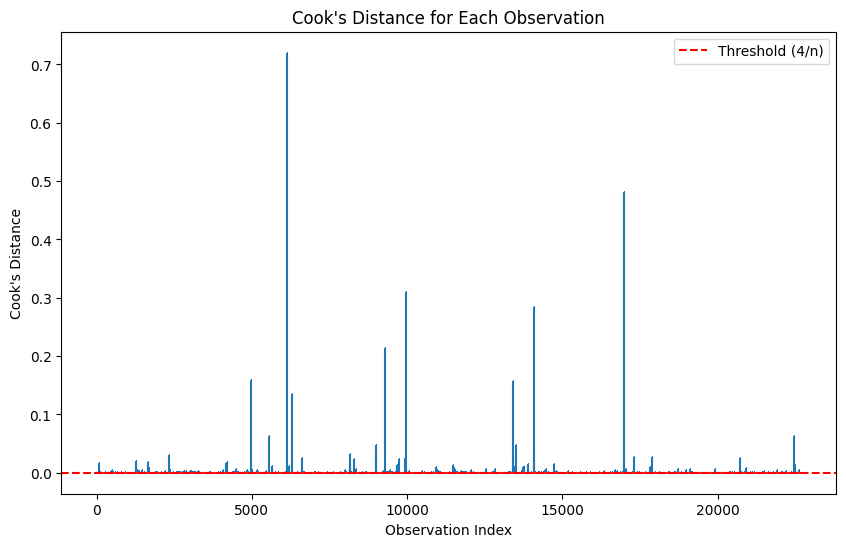

Number of Influential Observations: 961
Influential Observations Indices: [   18    56    73    79    80    81    82   115   125   131   135   177
   241   281   282   310   355   357   423   440   450   480   490   493
   507   508   531   532   541   580   581   586   589   602   607   611
   650   777   780   840   909   910   948  1032  1055  1069  1113  1188
  1220  1255  1268  1297  1323  1340  1351  1357  1360  1447  1459  1479
  1480  1481  1526  1540  1600  1608  1643  1659  1660  1661  1662  1663
  1665  1674  1675  1689  1690  1697  1726  1729  1738  1752  1757  1761
  1764  1765  1840  1855  1856  1869  1888  1902  1946  1960  2060  2080
  2098  2119  2188  2189  2190  2191  2268  2334  2338  2339  2341  2342
  2343  2344  2345  2346  2347  2348  2349  2351  2352  2353  2376  2377
  2382  2389  2398  2405  2476  2547  2567  2579  2612  2614  2640  2667
  2674  2687  2693  2726  2729  2737  2741  2756  2762  2815  2817  2820
  2821  2828  2861  2871  2880  2919  2971  2974  

In [86]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model)  
cooks_d = influence.cooks_distance[0]


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",", use_line_collection=True)
plt.axhline(y=4 / len(cooks_d), color='r', linestyle='--', label='Threshold (4/n)')
plt.title("Cook's Distance for Each Observation")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()


threshold = 4 / len(cooks_d)
influential_points = np.where(cooks_d > threshold)[0]

print(f"Number of Influential Observations: {len(influential_points)}")



### Removing Infuential Observations and refitting the model for comparison

In [88]:
data_cleaned = data.drop(index=influential_points)  

X_cleaned = sm.add_constant(data_cleaned[predictors])
y_cleaned = data_cleaned[outcome]  
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

print("Original Model Summary:")
print(model.summary())

print("\nModel Without Influential Points Summary:")
print(model_cleaned.summary())



Original Model Summary:
                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     6672.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        06:50:00   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.303e+05
Df Residuals:                   22682   BIC:                         6.304e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.224e+

again, slight improvement in the model fit after removing infulential points


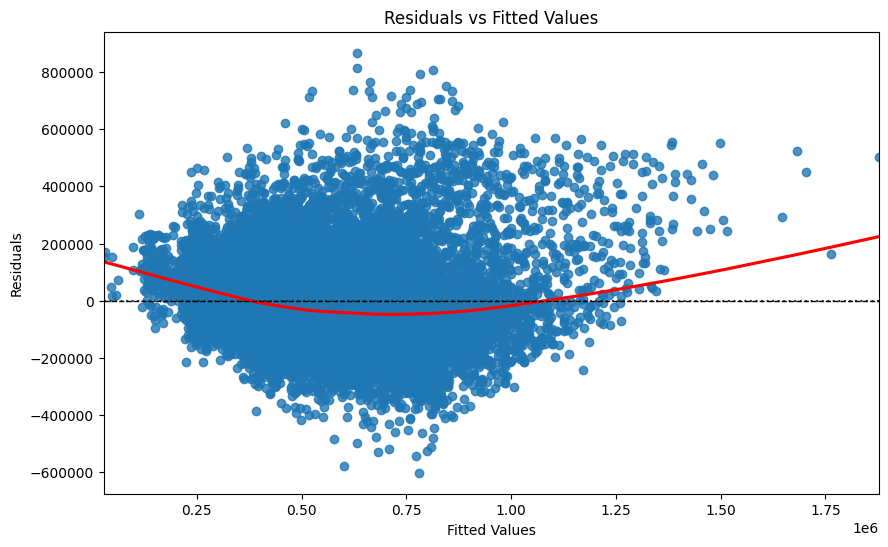

In [ ]:
residuals = model_cleaned.resid  
fitted = model_cleaned.fittedvalues  

plt.figure(figsize=(10, 6))
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()



The residuals vs. fitted values plot shows a slight U-shaped pattern, indicating potential nonlinearity in the relationship between predictors and the target variable, suggesting the linear model might not fully capture the underlying trends. While the residuals are relatively uniform in the central region, they appear to widen on the right, hinting at heteroskedasticity, where error variance increases for higher fitted values. Additionally, there are some extreme residuals far from zero, pointing to the presence of outliers even after removing influential points. The curvature in the red lowess line further suggests the need to explore nonlinear modeling approaches to improve the fit.

### Breusch-Pagan Test for Heteroskedasticity

In [91]:
from statsmodels.stats.diagnostic import het_breuschpagan


bp_test = het_breuschpagan(residuals, model_cleaned.model.exog)  
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))

print("Breusch-Pagan Test Results:")
for key, value in results.items():
    print(f"{key}: {value}")


Breusch-Pagan Test Results:
Lagrange multiplier statistic: 1764.7974934700817
p-value: 0.0
f-value: 384.0590419903889
f p-value: 0.0


### Visualizing Residuals (Histogram and Q-Q Plot)

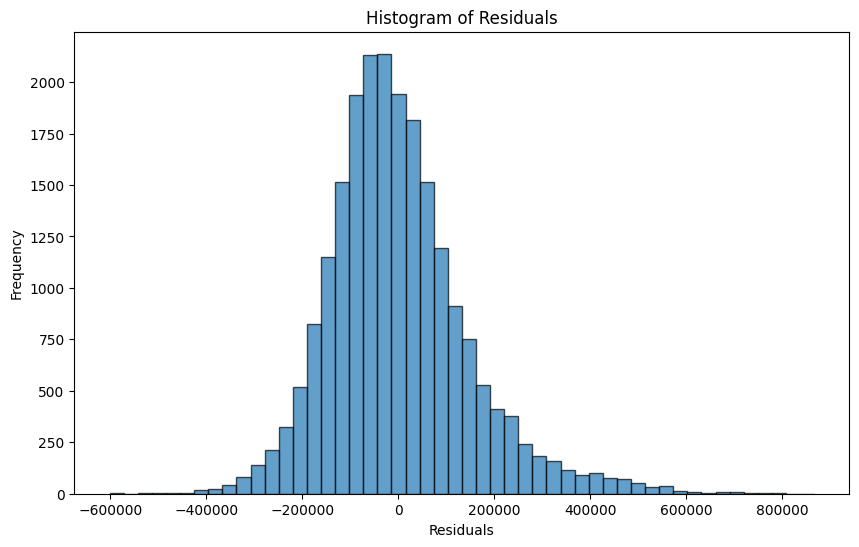

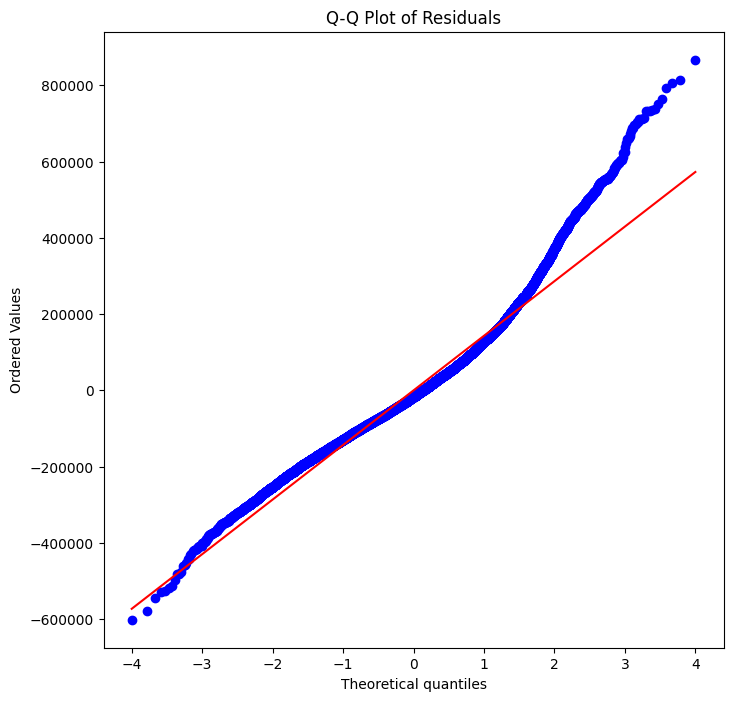

In [92]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 8))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


The histogram and Q-Q plot of residuals indicate that while the residuals are roughly centered around zero, there are signs of deviation from normality, particularly with heavier tails suggesting potential outliers. The Breusch-Pagan test strongly confirms the presence of heteroskedasticity (non-constant variance in residuals), as indicated by the highly significant p-value (0.0).

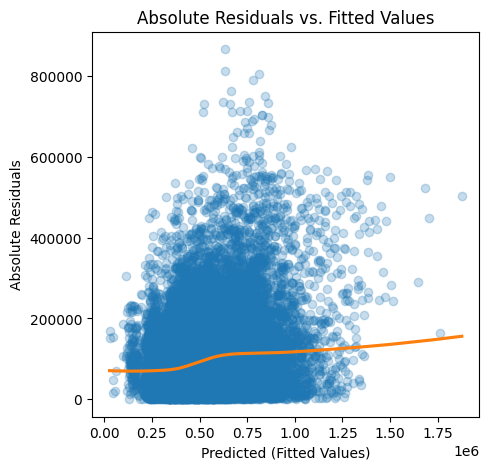

In [93]:
fitted_values = model_cleaned.fittedvalues
residuals = model_cleaned.resid


fig, ax = plt.subplots(figsize=(5, 5))


sns.regplot(x=fitted_values, y=np.abs(residuals),
            scatter_kws={'alpha': 0.25},  
            line_kws={'color': 'C1'},    
            lowess=True, ax=ax)


ax.set_xlabel('Predicted (Fitted Values)')
ax.set_ylabel('Absolute Residuals')
ax.set_title('Absolute Residuals vs. Fitted Values')

plt.show()


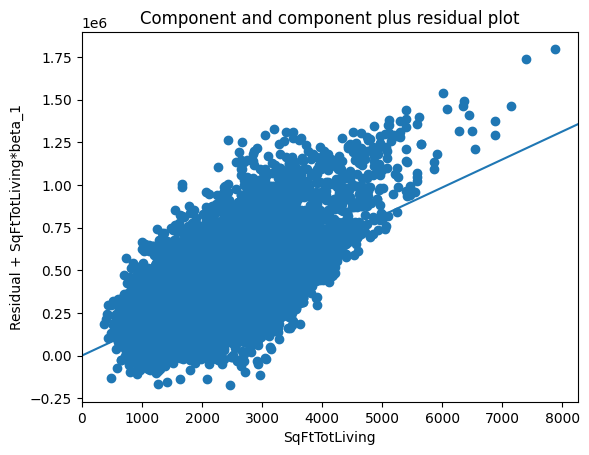

In [94]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate a partial residual plot for the predictor 'SqFtTotLiving'
fig = sm.graphics.plot_ccpr(model_cleaned, 'SqFtTotLiving')
plt.show()


                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     5743.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:18:36   Log-Likelihood:            -3.1351e+05
No. Observations:               22687   AIC:                         6.270e+05
Df Residuals:                   22680   BIC:                         6.271e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -2.93e+

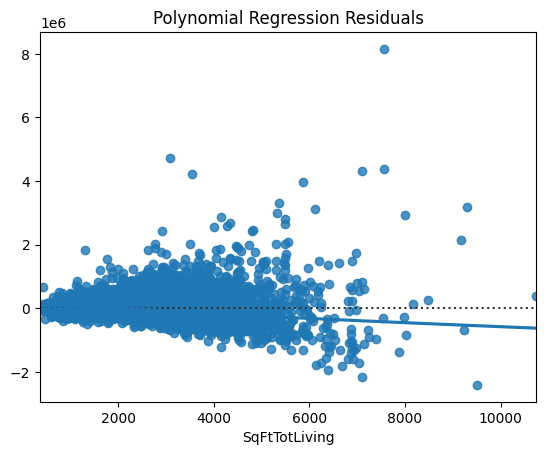

In [ ]:
# Add a quadratic term for SqFtTotLiving
model_poly = smf.ols(
    formula='AdjSalePrice ~ SqFtTotLiving + I(SqFtTotLiving**2) + SqFtLot + Bathrooms + Bedrooms + BldgGrade',
    data=data
)
result_poly = model_poly.fit()

# Print summary of the model
print(result_poly.summary())

# Partial residual plot for polynomial regression
fig, ax = plt.subplots()
sns.residplot(x=data['SqFtTotLiving'], y=result_poly.resid, lowess=True, ax=ax)
ax.set_title('Polynomial Regression Residuals')
plt.show()


In [103]:
from patsy import dmatrix

# Create a spline basis for SqFtTotLiving
spline_basis = dmatrix("bs(SqFtTotLiving, df=6, degree=3)", data=data, return_type='dataframe')

# Fit the spline regression model
model_spline = sm.OLS(data['AdjSalePrice'], spline_basis).fit()

# Print summary of the model
print(model_spline.summary())



                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     4568.
Date:                Sun, 15 Dec 2024   Prob (F-statistic):               0.00
Time:                        07:23:01   Log-Likelihood:            -3.1501e+05
No. Observations:               22687   AIC:                         6.300e+05
Df Residuals:                   22680   BIC:                         6.301e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
